In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anemia/Anemia.csv


In [87]:
df = pd.read_csv("/kaggle/input/anemia/Anemia.csv")

In [88]:
df.head()

,NO,LAB_TEST,RESULT,REFERENCE_INTERVAL,GENDER,IDENTIFICATION
0,1,Hemoglobin,14.9,13.5 - 17.5,Male,Not Anemia
1,1,MCH,22.7,27.0 - 31.0,Male,Not Anemia
2,1,MCHC,29.1,32.0 - 36.0,Male,Not Anemia
3,1,MCV,83.7,82.0 - 92.0,Male,Not Anemia
4,2,Hemoglobin,15.9,12.0 - 16.0,Female,Not Anemia


In [94]:
df = df.set_index("NO")

In [137]:
def build_dataframe(df):

    df2 = pd.DataFrame()

    df2['Hemoglobin'] = df[df['LAB_TEST'] == 'Hemoglobin']['RESULT']
    df2['MCH'] = df[df['LAB_TEST'] == 'MCH']['RESULT']
    df2['MCHC'] = df[df['LAB_TEST'] == 'MCHC']['RESULT']
    df2['MCV'] = df[df['LAB_TEST'] == 'MCV']['RESULT']

    results = []
    for i in range(1,df.index.nunique()+1):
        a = df[df.index == i]['IDENTIFICATION'].values[0]
        results.append(a)
    df2['Results'] = results
    return df2

In [138]:
df2 = build_dataframe(df)
df2

,Hemoglobin,MCH,MCHC,MCV,Results
NO,,,,,
1,14.9,22.7,29.1,83.7,Not Anemia
2,15.9,25.4,28.3,72.0,Not Anemia
3,9.0,21.5,29.6,71.2,Anemia
4,14.9,16.0,31.4,87.5,Not Anemia
5,14.7,22.0,28.2,99.5,Not Anemia
...,...,...,...,...,...
1417,10.6,25.4,28.2,82.9,Anemia
1418,12.1,28.3,30.4,86.9,Anemia
1419,13.1,17.7,28.1,80.7,Anemia


## Feature Engineering

In [154]:
from sklearn.preprocessing import LabelEncoder

In [156]:
le = LabelEncoder()
le.fit(df2['Results'])
df2['Results'] = le.transform(df2['Results'])

In [166]:
df2

,Hemoglobin,MCH,MCHC,MCV,Results
NO,,,,,
1,14.9,22.7,29.1,83.7,1
2,15.9,25.4,28.3,72.0,1
3,9.0,21.5,29.6,71.2,0
4,14.9,16.0,31.4,87.5,1
5,14.7,22.0,28.2,99.5,1
...,...,...,...,...,...
1417,10.6,25.4,28.2,82.9,0
1418,12.1,28.3,30.4,86.9,0
1419,13.1,17.7,28.1,80.7,0


## Train Test Split

In [157]:
from sklearn.model_selection import train_test_split

In [181]:
xs = df2.drop(['Results'],axis=1)
ys = df2['Results']

In [182]:
x_train, x_test, y_train, y_test = train_test_split(xs, ys,test_size=0.1,train_size=0.9,random_state=32)

## Classifiers

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
dt_classifier = DecisionTreeClassifier(max_depth=5)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [185]:
dt_classifier.score(x_train, y_train)

0.9233176838810642

In [186]:
dt_classifier.score(x_test, y_test)

0.9440559440559441

In [187]:
dt_classifier.predict([[16.4,31.4,35.6,88.4]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


array([1])

In [188]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

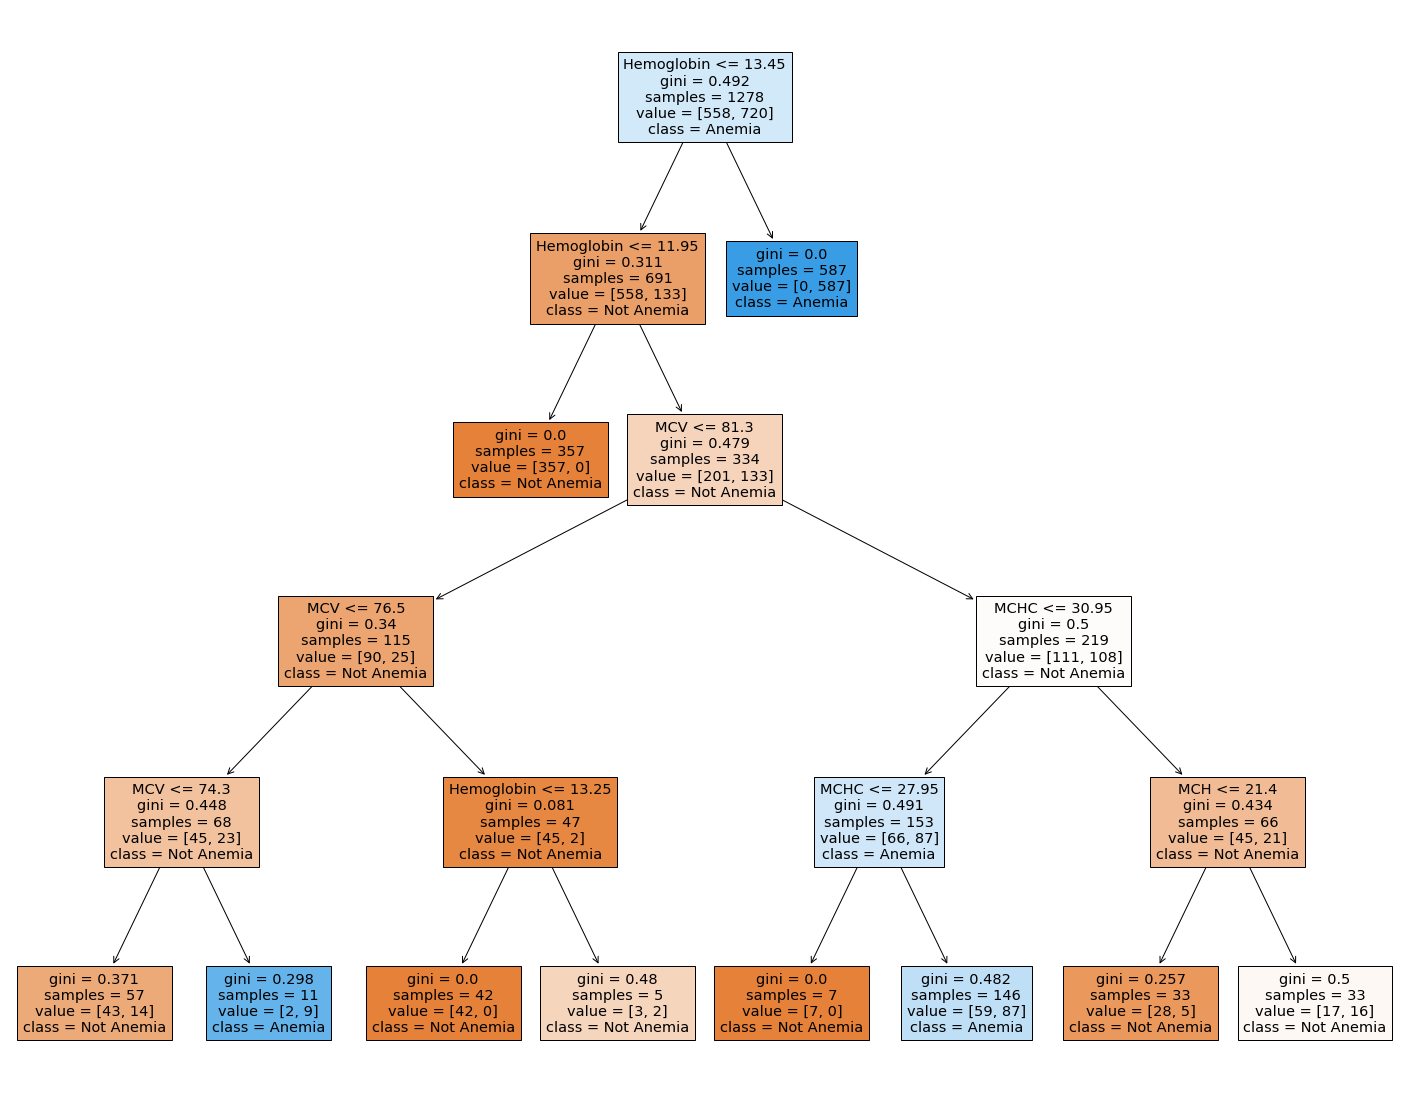

In [190]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_classifier, 
                   feature_names=df2.columns,  
                   class_names=['Not Anemia','Anemia'],
                   filled=True)